In [139]:
#Installing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import preprocessing

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.base import clone
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, recall_score, accuracy_score

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 500)

## Classifier Model

In [83]:
# Loading CSV file
df = pd.read_csv("./output/df1.csv")
df

,SEQN,weight,height,BMI,waist_circumference,hypertension,take_HTN_medicine,high_cholesterol,take_HCL_medicine,60_sec_pulse,systolic_bp,diastolic_bp,gender,age,race,education_level,marital_status,diabetes,heart_failure,coronary_heart_disease,angina,heart_attack,stroke
0,83732.0,94.8,184.5,27.8,101.1,0.0,Missing,0.0,Missing,76.0,122.67,65.33,1,6.200000e+01,White,College Graduate or Above,Married/Partner,1.0,0,0,0,0,0
1,83733.0,90.4,171.4,30.8,107.9,0.0,Missing,0.0,Missing,72.0,140.00,86.00,1,5.300000e+01,White,High School,Widowed/Divorced/Separated,0.0,0,0,0,0,0
2,83734.0,83.4,170.1,28.8,116.5,1.0,1,1.0,0,56.0,135.33,45.33,1,7.800000e+01,White,High School,Married/Partner,1.0,0,0,0,1,0
3,83735.0,109.8,160.9,42.4,110.1,0.0,Missing,0.0,Missing,78.0,134.00,70.00,0,5.600000e+01,White,College Graduate or Above,Married/Partner,0.0,0,0,0,0,0
4,83736.0,55.2,164.9,20.3,80.4,0.0,Missing,0.0,Missing,76.0,104.00,60.00,0,4.200000e+01,Black,Some College or AA Degree,Widowed/Divorced/Separated,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25526,124795.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5.000000e+00,Other Hispanic,Missing,Missing,0.0,Missing,Missing,Missing,Missing,Missing
25527,124800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5.397605e-79,Black,Missing,Missing,NaN,NaN,NaN,NaN,NaN,NaN
25528,124801.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.000000e+00,Mexican,Missing,Missing,0.0,Missing,Missing,Missing,Missing,Missing
25529,124804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.000000e+00,White,Missing,Missing,0.0,Missing,Missing,Missing,Missing,Missing


In [84]:
df1 = df.replace('Missing', np.nan)

In [95]:
df1.update(df1['hypertension'].fillna('0'))
df1.update(df1['high_cholesterol'].fillna('0'))
df1.update(df1['take_HTN_medicine'].fillna('0'))
df1.update(df1['take_HCL_medicine'].fillna('0'))
df1.update(df1['heart_failure'].fillna('0'))
df1.update(df1['coronary_heart_disease'].fillna('0'))
df1.update(df1['angina'].fillna('0'))
df1.update(df1['heart_attack'].fillna('0'))
df1.update(df1['stroke'].fillna('0'))
df1.update(df1['diabetes'].fillna('0'))

In [96]:
df1['hypertension'].value_counts()

0    19918
1     5613
Name: hypertension, dtype: int64

In [87]:
df1['hypertension'].replace({1.0: '1', # Yes
                             0.0: '0'  # No
                        }, inplace=True)

In [88]:
df1['heart_failure'].replace({1.0: '1', # Yes
                         0.0: '0'  # No
                        }, inplace=True)

In [89]:
df1['diabetes'].replace({1.0: '1', # Yes
                         0.0: '0'  # No
                        }, inplace=True)

In [90]:
df1['high_cholesterol'].replace({1.0: '1', # Yes
                                 0.0: '0'  # No
                        }, inplace=True)

In [91]:
df1['diabetes'].value_counts()

0    23230
1     2301
Name: diabetes, dtype: int64

In [92]:
df1['heart_failure'].value_counts()

0    24956
1      575
Name: heart_failure, dtype: int64

In [93]:
# replace the median value 
df1['weight'] = df1['weight'].fillna(df1['weight'].mean())
df1['height'] = df1['height'].fillna(df1['height'].mean())
df1['BMI'] = df1['BMI'].fillna(df1['BMI'].mean())
df1['waist_circumference'] = df1['waist_circumference'].fillna(df1['waist_circumference'].mean())
df1['60_sec_pulse'] = df1['60_sec_pulse'].fillna(df1['60_sec_pulse'].mean())
df1['systolic_bp'] = df1['systolic_bp'].fillna(df1['systolic_bp'].mean())
df1['diastolic_bp'] = df1['diastolic_bp'].fillna(df1['diastolic_bp'].mean())

In [98]:
df1.update(df1['education_level'].fillna('unlnown'))
df1.update(df1['marital_status'].fillna('unlnown'))

In [99]:
df1.isna().sum()

SEQN                      0
weight                    0
height                    0
BMI                       0
waist_circumference       0
hypertension              0
take_HTN_medicine         0
high_cholesterol          0
take_HCL_medicine         0
60_sec_pulse              0
systolic_bp               0
diastolic_bp              0
gender                    0
age                       0
race                      0
education_level           0
marital_status            0
diabetes                  0
heart_failure             0
coronary_heart_disease    0
angina                    0
heart_attack              0
stroke                    0
dtype: int64

In [100]:
df1.shape

((25531, 23), (25531, 23))

In [102]:
df1['hypertension'].value_counts()

0    19918
1     5613
Name: hypertension, dtype: int64

In [110]:
df1[['take_HTN_medicine']] = df1[['take_HTN_medicine']].astype(int)
df1[['take_HCL_medicine']] = df1[['take_HCL_medicine']].astype(int)
df1[['heart_failure']] = df1[['heart_failure']].astype(int)
df1[['coronary_heart_disease']] = df1[['coronary_heart_disease']].astype(int)
df1[['hypertension']] = df1[['hypertension']].astype(int)
df1[['high_cholesterol']] = df1[['high_cholesterol']].astype(int)
df1[['angina']] = df1[['angina']].astype(int)
df1[['heart_attack']] = df1[['heart_attack']].astype(int)
df1[['stroke']] = df1[['stroke']].astype(int)
df1[['diabetes']] = df1[['diabetes']].astype(int)

In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25531 entries, 0 to 25530
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SEQN                    25531 non-null  float64
 1   weight                  25531 non-null  float64
 2   height                  25531 non-null  float64
 3   BMI                     25531 non-null  float64
 4   waist_circumference     25531 non-null  float64
 5   hypertension            25531 non-null  int32  
 6   take_HTN_medicine       25531 non-null  int32  
 7   high_cholesterol        25531 non-null  int32  
 8   take_HCL_medicine       25531 non-null  int32  
 9   60_sec_pulse            25531 non-null  float64
 10  systolic_bp             25531 non-null  float64
 11  diastolic_bp            25531 non-null  float64
 12  gender                  25531 non-null  int64  
 13  age                     25531 non-null  float64
 14  race                    25531 non-null

In [112]:
df1 = df1.set_index('SEQN')

In [114]:
df1.to_csv('./output/df_try.csv', index=False)

In [113]:
df1.columns

Index(['weight', 'height', 'BMI', 'waist_circumference', 'hypertension',
       'take_HTN_medicine', 'high_cholesterol', 'take_HCL_medicine',
       '60_sec_pulse', 'systolic_bp', 'diastolic_bp', 'gender', 'age', 'race',
       'education_level', 'marital_status', 'diabetes', 'heart_failure',
       'coronary_heart_disease', 'angina', 'heart_attack', 'stroke'],
      dtype='object')

In [119]:
# one hot encoding for race
enc = OneHotEncoder(sparse=False)
race_enc = enc.fit_transform(df1[['race']])
race_enc_names = enc.get_feature_names_out(['race'])
race_enc_df = pd.DataFrame(race_enc, columns = race_enc_names)
df1 = pd.concat([df1.reset_index(drop=True), race_enc_df.reset_index(drop=True)], axis = 1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [123]:
# one hot encoding for education_level
education_enc = enc.fit_transform(df1[['education_level']])
education_enc_names = enc.get_feature_names_out(['education_level'])
education_enc_df = pd.DataFrame(education_enc, columns = education_enc_names)
df1 = pd.concat([df1.reset_index(drop=True), education_enc_df.reset_index(drop=True)], axis = 1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [125]:
# one hot encoding for marital_status
marital_enc = enc.fit_transform(df1[['marital_status']])
marital_enc_names = enc.get_feature_names_out(['marital_status'])
marital_enc_df = pd.DataFrame(marital_enc, columns = marital_enc_names)
df1 = pd.concat([df1.reset_index(drop=True), marital_enc_df.reset_index(drop=True)], axis = 1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [129]:
df1 = df1.drop(['race', 'education_level', 'marital_status'], axis=1)

In [128]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25531 entries, 0 to 25530
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   weight                                     25531 non-null  float64
 1   height                                     25531 non-null  float64
 2   BMI                                        25531 non-null  float64
 3   waist_circumference                        25531 non-null  float64
 4   hypertension                               25531 non-null  int32  
 5   take_HTN_medicine                          25531 non-null  int32  
 6   high_cholesterol                           25531 non-null  int32  
 7   take_HCL_medicine                          25531 non-null  int32  
 8   60_sec_pulse                               25531 non-null  float64
 9   systolic_bp                                25531 non-null  float64
 10  diastolic_bp          

In [130]:
df1.to_csv('./output/df_try.csv', index=False)

In [156]:
df1 = pd.read_csv('./output/df_try.csv')

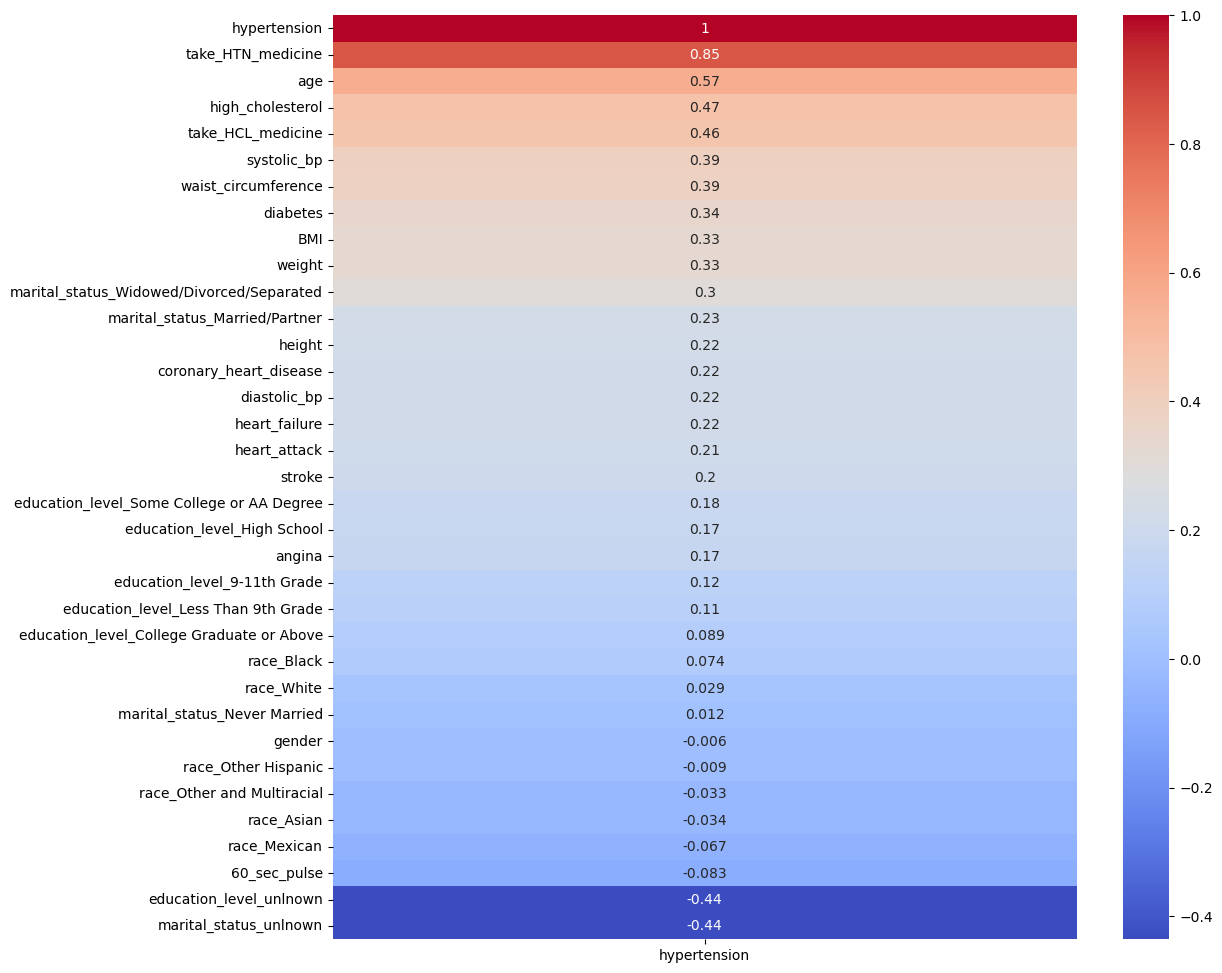

In [135]:
plt.figure(figsize=(12,12))

sns.heatmap(df1.corr()[['hypertension']].sort_values('hypertension', ascending=False), annot=True, cmap='coolwarm');

In [149]:
#df1 = df1.drop(['take_HTN_medicine'], axis=1)

In [157]:
model = GradientBoostingClassifier()
# Cheking interaction betweem age and BMI
df1['interaction_age_bmi'] = df1['age'] * df1['BMI']

In [158]:
def feature_imporatance(df, model):
    default_features = list(df.columns)
    default_features.remove('hypertension')
    target = 'hypertension'
    
    X = df[default_features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    features = df.drop(['hypertension'], axis = 1)
    model.fit(X_train, y_train)
    importances = list(model.feature_importances_)
    feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(features, importances)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    [print('Variable: {:10} Importance: {}'.format(*pair)) for pair in feature_importances]
    return list(map(lambda x: [x[0], x[1]], feature_importances))

In [159]:
feature_imporatance = feature_imporatance(df1, model)

Variable: take_HTN_medicine Importance: 0.9157
Variable: diastolic_bp Importance: 0.0222
Variable: interaction_age_bmi Importance: 0.0217
Variable: systolic_bp Importance: 0.0138
Variable: high_cholesterol Importance: 0.0082
Variable: age        Importance: 0.0032
Variable: weight     Importance: 0.0022
Variable: waist_circumference Importance: 0.0017
Variable: BMI        Importance: 0.0014
Variable: 60_sec_pulse Importance: 0.0013
Variable: angina     Importance: 0.0013
Variable: stroke     Importance: 0.0013
Variable: take_HCL_medicine Importance: 0.0011
Variable: heart_failure Importance: 0.0011
Variable: height     Importance: 0.0009
Variable: heart_attack Importance: 0.0007
Variable: education_level_Some College or AA Degree Importance: 0.0006
Variable: diabetes   Importance: 0.0005
Variable: marital_status_Widowed/Divorced/Separated Importance: 0.0005
Variable: education_level_College Graduate or Above Importance: 0.0002
Variable: race_Asian Importance: 0.0001
Variable: race_Mexi

In [167]:
features = ['age', 'gender','take_HTN_medicine', 'weight', 'BMI', 'waist_circumference', 'diastolic_bp',
            'systolic_bp', 'high_cholesterol', '60_sec_pulse']
target = 'hypertension'

In [168]:
X = df1[features]
y = df1[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [10]:
# Trying different models to check accuracy
# 1. Decision Tree Classifier Accuracy: 70.9
# 2. Random Forest Classifier Accuracy: 73.9
# 3. XGboost Classifier Accuracy: 74.9

In [11]:

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
# dtree_model = DecisionTreeClassifier().fit(X_train, y_train)
# y_pred = dtree_model.predict(X_test)
# print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

In [12]:
# from sklearn.ensemble import RandomForestClassifier
# regressor1 = RandomForestClassifier(criterion='gini',
#                                  n_estimators=5,
#                                  random_state=1,
#                                  n_jobs=2)
# regressor1.fit(X_train, y_train)
# from sklearn.metrics import accuracy_score
# y_pred = regressor1.predict(X_test)
# print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

In [13]:
# from sklearn.ensemble import AdaBoostClassifier
# model = AdaBoostClassifier(n_estimators=100, random_state=0)
# model.fit(X_train,y_train)
# from sklearn.metrics import accuracy_score
# y_pred = model.predict(X_test)
# print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

In [171]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.949


In [16]:
df['DPDB_VAL']

0       2
1       0
2       0
3       0
4       1
       ..
5905    1
5906    1
5907    0
5908    0
5909    0
Name: DPDB_VAL, Length: 5910, dtype: int32

In [173]:
X_test

,age,gender,take_HTN_medicine,weight,BMI,waist_circumference,diastolic_bp,systolic_bp,high_cholesterol,60_sec_pulse
18982,4.0,1,0,20.4,17.8,58.0,69.167997,119.942377,0,73.070391
420,20.0,1,0,70.6,22.2,75.2,49.330000,114.000000,0,66.000000
19421,16.0,1,0,65.7,18.8,71.6,62.670000,98.670000,0,89.000000
12883,72.0,0,1,84.6,32.0,108.7,68.330000,130.670000,0,74.670000
10400,52.0,1,1,123.9,44.1,131.1,68.670000,103.000000,1,76.330000
...,...,...,...,...,...,...,...,...,...,...
6215,54.0,1,0,93.9,29.1,108.4,54.670000,141.330000,0,52.000000
18287,80.0,1,1,83.6,31.5,116.9,75.330000,145.000000,1,51.000000
7561,34.0,0,0,47.7,18.7,70.6,63.330000,96.670000,0,66.000000
20631,37.0,0,0,67.8,32.6,97.4,69.670000,111.670000,0,74.000000


In [18]:
df1 = pd.DataFrame(X_test[:,1:2])

df1


,0
0,65.0
1,19.0
2,55.0
3,31.0
4,59.0
...,...
2200,60.0
2201,28.0
2202,61.0
2203,63.0


In [19]:
df1['1'] = y_test
df1.columns

Index([0, '1'], dtype='object')

## plotting

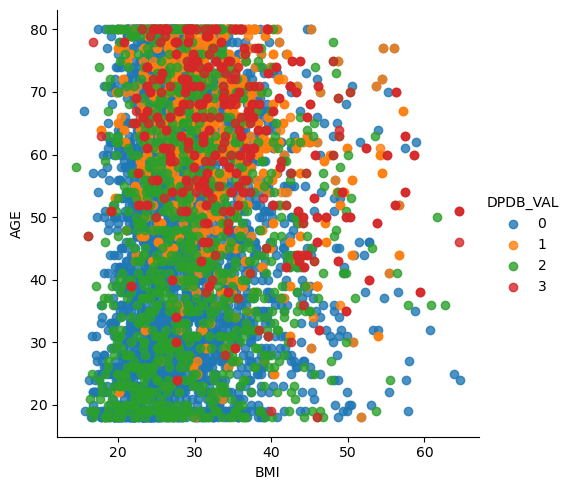

In [20]:
import matplotlib.pyplot as plt
y = [i for i in range(2205)]
# y = df['DPDB_VAL']
# plt.scatter(y, x)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# plt.title('Scatter plot on Iris dataset')

import seaborn as sns
from seaborn import scatterplot
# fig, ax = plt.subplots(figsize=(20,10))
# sns.scatterplot(x="BMI", y="AGE", data=df, hue='DPDB_VAL', palette="muted")
sns.lmplot(x="BMI", y="AGE", data=df, hue='DPDB_VAL',fit_reg=False)
# fig, ax = plt.subplots(figsize=(20,10))
# sns.scatterplot(x=0, y='1', hue='1', data=df1, ax = ax)

## Testing

In [39]:
# Checking for different DPDB_Val: 
# Mappings:
# NDPNDB: No Depression & No Diabetes :0
# NDPDB: No Depression & Diabetes     :1
# DPNDB: Depression & No Diabetes     :2
# DPDB: Depression & Diabetes         :3

df.columns

Index(['SEQN', 'GENDER', 'AGE', 'HISPANIC_O', 'SLEEP_HRS', 'DIASTOLIC',
       'SYSTOLIC', 'WEIGHT', 'HEIGHT', 'BMI', 'DIABETES', 'DPQ010', 'DPQ020',
       'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090',
       'SCORE', 'DEPRESSION', 'SFHL', 'HFHL', 'NDPNDB', 'NDPDB', 'DPNDB',
       'DPDB', 'DPDB_VAL'],
      dtype='object')

In [22]:
#testing format of data to use it in backend. 
data = [[1.0,69.0,3.0,5.0,78.00,151.333, 111.7,182.7,33.5,36.250,55.00]]
data_pred = model.predict(data)
data_pred


array([1], dtype=int64)

In [36]:
data_pred_prob = model.predict_proba(data)
data_pred_prob

array([[0.9245468 , 0.01821303, 0.05338919, 0.00385096]], dtype=float32)

In [31]:
probability_class_1 = model.predict_proba(data)[:, 1]

In [32]:
probability_class_1

array([0.01821303], dtype=float32)

In [33]:
probability_class_2 = model.predict_proba(data)[:, 2]
probability_class_2

array([0.05338919], dtype=float32)

In [34]:
probability_class_3 = model.predict_proba(data)[:, 3]
probability_class_3

array([0.00385096], dtype=float32)

In [23]:
#testing format of data to use it in backend. 
data = [[2.0,22.0,3.0,7.5,60.00, 88.667,64.5,152.0,27.9,0.0,-5.0]]
data_pred = model.predict(data)
data_pred

array([2], dtype=int64)

In [24]:
#testing format of data to use it in backend. 
data = [[1.0,78.0,4.0,10.0,85.33,173.00,53.0,178.1,16.7,34.375,60]]
data_pred = model.predict(data)
data_pred

array([3], dtype=int64)

In [25]:
#testing format of data to use it in backend. 
data = [[1.0,37.0,4.0,9.0,76.667,122.667,102.2,184.4,30.1,12.50,18.333]]
data_pred = model.predict(data)
data_pred

array([0], dtype=int64)

In [26]:
# using JoBlib for creating xgboost classifier model
import joblib
from joblib import dump
dump(model, 'DPDB_classifer.pkl')

['DPDB_classifer.pkl']